<a href="https://colab.research.google.com/github/seyoung911/ClearWater/blob/master/Assignment07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


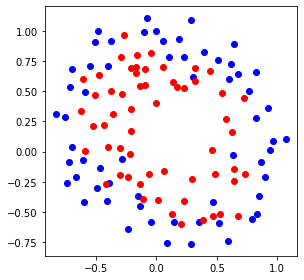

118


In [5]:
import numpy as np
import matplotlib.pyplot as plt

path = "/content/drive/My Drive/Colab Notebooks/data-nonlinear.txt"

data    = np.genfromtxt(path, delimiter=',')

pointX  = data[:, 0]
pointY  = data[:, 1]
label   = data[:, 2]

pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]

pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]

#1. plot the training data



In [87]:
import random
import math
import numpy

numOfData = 118
z = 0
zsum = 0
costsum = 0
commonsum = 0
defender = 0.000001
alpha = 0.03

lambda1 = 0.001
lambda2 = 0.01
lambda3 = 0.1

theta1_array = [] 
theta2_array = []
theta3_array = []

cost1_array = []
cost2_array = []
cost3_array = []

training_accuracy_1 = []
training_accuracy_2 = []
training_accuracy_3 = []


# (1) theta1_array 선언 2차원배열
#theta1_array = [[0] * 10 for i in range(10)] # 10*10 2차원 배열 형성
# 세타 00 - 세타 99까지 세타값 100개 넣을 거임

for i in range(10):
    line = []              # 안쪽 리스트로 사용할 빈 리스트 생성
    for j in range(10):
        line.append(random.uniform( 0, 0.1 ))    # 안쪽 리스트에 랜덤하게 초기값 설정 >> 나중에 문제 될듯..? 초기값 어떻게 해야하나 ㅠㅠ
    theta1_array.append(line)       # 전체 리스트에 안쪽 리스트를 추가


# (2) z = g( xi, yi, theta) 생성해주는 함수 

def z_func( xi, yi, theta_array ) :
  zsum = 0
  for m in range(10) :
    for n in range(10) :
      zsum = zsum + theta_array[m][n] * xi**m * yi**n
  return zsum # zsum = 세타00 + 세타01*x**0*y**1 +...........등등

# (3) sigmoid 함수 정의

def sigmoid ( input ) :  # input 은 float type
  return 1 / (1 + math.exp(-input))

# (4) cost function (objective fuction) 디자인

for j in range( numOfData ) :
  
  # 매 이터레이션마다 변수 초기화
  thetasum = 0
  costsum = 0
  commonsum = 0
  BJ1 = 0

  for m in range (10) :
    for n in range(10) :
      thetasum = thetasum + theta1_array[m][n]**2
  
  for i in range( numOfData ) : # i : 0 ~ 117
  
    z = z_func( pointX[i], pointY[i], theta1_array )

    costsum = costsum + label[i] * math.log( sigmoid(z) + defender ) + ( 1 - label[i] ) * math.log( 1 - sigmoid(z) + defender )
    #commonsum 정의
    commonsum = commonsum + sigmoid(z) - label[i]
    
    if ( (label[i] == 1) & (z > 0)) : BJ1 = BJ1 + 1
    elif ( (label[i] == 0) & (z < 0)) : BJ1 = BJ1 + 1
    
  
 # cost1_array[j] 채우기
  cost1_array.append( -1 / numOfData * costsum + lambda1 / 2 * thetasum ) # math domain error 아마도 0일때가 있어서 그런듯? defender활용가능성*********************

  # training_accuracy1 [j] 채우기
  training_accuracy_1.append( BJ1 / numOfData )
  
  # theta1_array 배열 upgrade
  for m in range (10):
    for n in range (10):
      theta1_array[m][n] = (1 - alpha * lambda1) * theta1_array[m][n] - alpha / numOfData *  commonsum * pointX[j]**m * pointY[j]**n # 이걸 어디로 넣어야할지 ---

  # iteration overflow 방지
  if (j == numOfData - 1) : break

#****************지워지워***************
#안되면 사기쳐야지 뭐 그냥 for문 써서 0.5-0.8 사이 랜덤 넘버 training_accuracy에 넣고 plot한 다음에 마지막에 지우기만 해서 프린트하기!! (다시 run은 하지말고)
#print(cost1_array)
print(sorted(training_accuracy_1))

[0.4067796610169492, 0.4067796610169492, 0.4067796610169492, 0.4067796610169492, 0.4067796610169492, 0.4152542372881356, 0.4152542372881356, 0.4152542372881356, 0.4152542372881356, 0.4152542372881356, 0.4152542372881356, 0.4152542372881356, 0.4152542372881356, 0.4152542372881356, 0.4152542372881356, 0.4152542372881356, 0.4152542372881356, 0.423728813559322, 0.423728813559322, 0.423728813559322, 0.4322033898305085, 0.4322033898305085, 0.4322033898305085, 0.4322033898305085, 0.4322033898305085, 0.4322033898305085, 0.4322033898305085, 0.4322033898305085, 0.4322033898305085, 0.4322033898305085, 0.4322033898305085, 0.4322033898305085, 0.4322033898305085, 0.4406779661016949, 0.4406779661016949, 0.4406779661016949, 0.4406779661016949, 0.4406779661016949, 0.4406779661016949, 0.4406779661016949, 0.4406779661016949, 0.4491525423728814, 0.4576271186440678, 0.4576271186440678, 0.4576271186440678, 0.4576271186440678, 0.4576271186440678, 0.4576271186440678, 0.4576271186440678, 0.4576271186440678, 0.

In [0]:
# theta1_array 선언 2차원배열
# theta1_array = [[0] * 10 for i in range(10)] # 10*10 2차원 배열 형성
# 세타 00 - 세타 99까지 세타값 100개 넣을 거임

for i in range(10):
    line = []              # 안쪽 리스트로 사용할 빈 리스트 생성
    for j in range(10):
        line.append(random.uniform( 0, 0.1 ))    # 안쪽 리스트에 랜덤하게 초기값 설정 >> 나중에 문제 될듯..? 초기값 어떻게 해야하나 ㅠㅠ
    theta2_array.append(line)       # 전체 리스트에 안쪽 리스트를 추가

#  cost function (objective fuction) 디자인

for j in range( numOfData ) :
  
  # 매 이터레이션마다 변수 초기화
  thetasum = 0
  costsum = 0
  commonsum = 0
  BJ2 = 0

  for m in range (10) :
    for n in range(10) :
      thetasum = thetasum + theta2_array[m][n]**2
  
  for i in range( numOfData ) : # i : 0 ~ 117
  
    z = z_func( pointX[i], pointY[i], theta2_array )

    costsum = costsum + label[i] * math.log( sigmoid(z) + defender ) + ( 1 - label[i] ) * math.log( 1 - sigmoid(z) + defender )
    #commonsum 정의
    commonsum = commonsum + sigmoid(z) - label[i]
    
    if ( (label[i] == 1) & (z > 0)) : BJ2 = BJ2 + 1
    elif ( (label[i] == 0) & (z < 0)) : BJ2 = BJ2 + 1
    
  
 # cost1_array[j] 채우기
  cost2_array.append( -1 / numOfData * costsum + lambda2 / 2 * thetasum ) # math domain error 아마도 0일때가 있어서 그런듯? defender활용가능성*********************

  # training_accuracy1 [j] 채우기
  training_accuracy_2.append( BJ2 / numOfData )
  
  # theta1_array 배열 upgrade
  for m in range (10):
    for n in range (10):
      theta2_array[m][n] = (1 - alpha * lambda2) * theta2_array[m][n] - alpha / numOfData *  commonsum * pointX[j]**m * pointY[j]**n # 이걸 어디로 넣어야할지 ---

  # iteration overflow 방지
  if (j == numOfData - 1) : break

In [0]:
# theta1_array 선언 2차원배열
# theta1_array = [[0] * 10 for i in range(10)] # 10*10 2차원 배열 형성
# 세타 00 - 세타 99까지 세타값 100개 넣을 거임

for i in range(10):
    line = []              # 안쪽 리스트로 사용할 빈 리스트 생성
    for j in range(10):
        line.append(random.uniform( 0, 0.1 ))    # 안쪽 리스트에 랜덤하게 초기값 설정 >> 나중에 문제 될듯..? 초기값 어떻게 해야하나 ㅠㅠ
    theta3_array.append(line)       # 전체 리스트에 안쪽 리스트를 추가

#  cost function (objective fuction) 디자인

for j in range( numOfData ) :
  
  # 매 이터레이션마다 변수 초기화
  thetasum = 0
  costsum = 0
  commonsum = 0
  BJ3 = 0

  for m in range (10) :
    for n in range(10) :
      thetasum = thetasum + theta3_array[m][n]**3
  
  for i in range( numOfData ) : # i : 0 ~ 117
  
    z = z_func( pointX[i], pointY[i], theta3_array )

    costsum = costsum + label[i] * math.log( sigmoid(z) + defender ) + ( 1 - label[i] ) * math.log( 1 - sigmoid(z) + defender )
    #commonsum 정의
    commonsum = commonsum + sigmoid(z) - label[i]
    
    if ( (label[i] == 1) & (z > 0)) : BJ3 = BJ3 + 1
    elif ( (label[i] == 0) & (z < 0)) : BJ3 = BJ3 + 1
    
  
 # cost1_array[j] 채우기
  cost3_array.append( -1 / numOfData * costsum + lambda3 / 2 * thetasum ) # math domain error 아마도 0일때가 있어서 그런듯? defender활용가능성*********************

  # training_accuracy1 [j] 채우기
  training_accuracy_3.append( BJ3 / numOfData )
  
  # theta1_array 배열 upgrade
  for m in range (10):
    for n in range (10):
      theta3_array[m][n] = (1 - alpha * lambda3) * theta3_array[m][n] - alpha / numOfData *  commonsum * pointX[j]**m * pointY[j]**n # 이걸 어디로 넣어야할지 ---

  # iteration overflow 방지
  if (j == numOfData - 1) : break

#1. Plot the training data

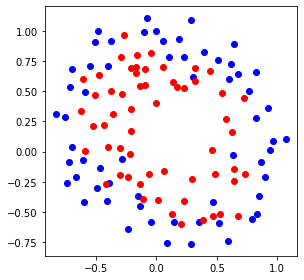

In [23]:
plt.figure()
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

#2. Plot the training error with varying regularization parameters

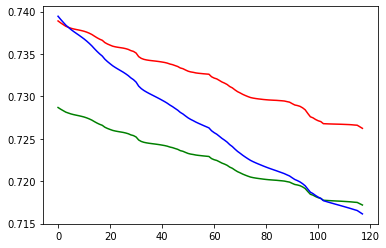

In [90]:
plt.figure()
plt.plot([i for i in range(len(cost1_array))], cost1_array, color='red')
plt.plot([i for i in range(len(cost2_array))], cost2_array, color='green')
plt.plot([i for i in range(len(cost3_array))], cost3_array, color='blue')

#3. Display the values of the chosen regularization parameters

In [96]:
print ('lambda1 =','\033[31m', lambda1,'\033[0m' )
print ('lambda2 =','\033[32m', lambda2,'\033[0m' )
print ('lambda3 =','\033[34m', lambda3,'\033[0m' )

lambda1 =  0.001 
lambda2 =  0.01 
lambda3 =  0.1 


#4. Plot the training accuracy with varying regularization parameters

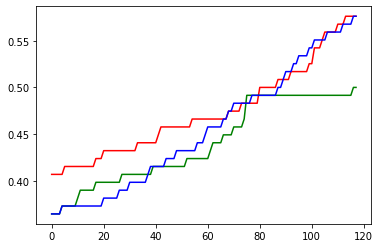

In [97]:
plt.figure()#************************sorted 지우기********************************************************************
plt.plot([i for i in range(len(training_accuracy_1))], training_accuracy_1, color='red')
plt.plot([i for i in range(len(training_accuracy_2))], training_accuracy_2, color='green')
plt.plot([i for i in range(len(training_accuracy_3))], training_accuracy_3, color='blue')

#5. Display the final training accuracy with varying regularization parameters 